<a href="https://colab.research.google.com/github/sanay21/data-science-projects/blob/main/Data_Analysis_Case_Study_Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis Case Study - Marketing Campaigns

The Objective

The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database.

To build the model, a pilot campaign involving 2240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6720MU and the revenue generated by the customers who accepted the offer was 3674MU. Globally the campaign had a profit of -3046MU. The success rate of the campaign was 15%.

The objective of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.








In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving marketing_data.csv to marketing_data.csv


In [3]:

df = pd.read_csv('marketing_data.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

RENAMING COLUMNS

In [6]:
df.columns = df.columns.str.strip()

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Fixing the Data Types of Columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
df['Income'] = df['Income'].str.strip().str.replace('$', '', regex=False).str.replace(',', '', regex=False)

df['Income'] = df['Income'].astype('float')

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [11]:

df_dropna = df.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [13]:
numerical_features = list(df.select_dtypes(include=['number']).columns)
categorical_features = list(df.select_dtypes(include=['object']).columns)

numerical_features.remove('ID')

num_discrete_features = ['Year_Birth', 'Kidhome', 'Teenhome',
                        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                        'Response', 'Complain']

numerical_features = [feature for feature in numerical_features if feature not in num_discrete_features]

print(numerical_features)

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [14]:
df_median_imputed = df[numerical_features].fillna(df[numerical_features].median())

df_median_imputed.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean, median, or mode based on observed variables
imputer = SimpleImputer(strategy='mean')  # Can also use 'median' or 'most_frequent'

df_mean_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_features]),
                               columns=df[numerical_features].columns)

df_mean_imputed.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [16]:
from sklearn.impute import KNNImputer

# Preprocessing
cat_encoded_df = pd.get_dummies(df[categorical_features])

combined_df = pd.concat([df[numerical_features], df[num_discrete_features], cat_encoded_df], axis=1)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors = 3)

df_knn_imp = pd.DataFrame(knn_imputer.fit_transform(combined_df),
                         columns=combined_df.columns,
                         index=combined_df.index)

df_knn_imp.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Kidhome,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52229.343452,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,1968.805804,0.444196,...,0.034375,0.000893,0.071429,0.119643,0.053571,0.066071,0.001339,0.150446,0.488839,0.048661
std,25113.745615,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.984069,0.538398,...,0.182231,0.029874,0.257597,0.324616,0.225220,0.248462,0.036580,0.357588,0.499987,0.215206
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1893.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35349.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1959.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51371.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,1970.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68468.250000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1977.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,1996.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Univariate Analysis - Statistical Non Visual Analysis

In [17]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [18]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [21]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value Counts: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value Counts: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

********** Country **********
count                                     2240
nunique                                      8
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
Name: Country, dtype: obje

In [20]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [22]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min           0.000000
max       11191.000000
mean       5592.159821
median     5458.500000
std        3246.662198
Name: ID, dtype: float64

********** Year_Birth **********
min       1893.000000
max       1996.000000
mean      1968.805804
median    1970.000000
std         11.984069
Name: Year_Birth, dtype: float64

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Kidhome **********
min       0.000000
max       2.000000
mean      0.444196
median    0.000000
std       0.538398
Name: Kidhome, dtype: float64

********** Teenhome **********
min       0.000000
max       2.000000
mean      0.506250
median    0.000000
std       0.544538
Name: Teenhome, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

***

In [23]:
discrete_num_cols = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                   'Response', 'Complain']
numerical_df.drop(columns=discrete_num_cols, axis=1, inplace=True)

print('Shape:', numerical_df.shape)
print('Columns:', numerical_df.columns)

Shape: (2240, 8)
Columns: Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')


In [24]:
discrete_num_df = df[discrete_num_cols]

print('Shape:', discrete_num_df.shape)
print('Columns:', discrete_num_df.columns)

Shape: (2240, 16)
Columns: Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')


In [25]:
discrete_num_df = discrete_num_df.drop(columns=['ID'], axis=1)

print('Shape:', discrete_num_df.shape)
print('Columns:', list(discrete_num_df.columns))

Shape: (2240, 15)
Columns: ['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']


In [26]:
numerical_univariate_analysis(numerical_df)

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

********** MntWines **********
min          0.000000
max       1493.000000
mean       303.935714
median     173.500000
std        336.597393
Name: MntWines, dtype: float64

********** MntFruits **********
min         0.000000
max       199.000000
mean       26.302232
median      8.000000
std        39.773434
Name: MntFruits, dtype: float64

********** MntMeatProducts **********
min          0.000000
max       1725.000000
mean       166.950000
median      67.000000
std        225.715373
Name: MntMeatProducts, dtype: float64

********** MntFishProducts **********
min         0.000000
max       259.000000
mean       37.525446
median     12.000000
std     

2. Univariate - Visual Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

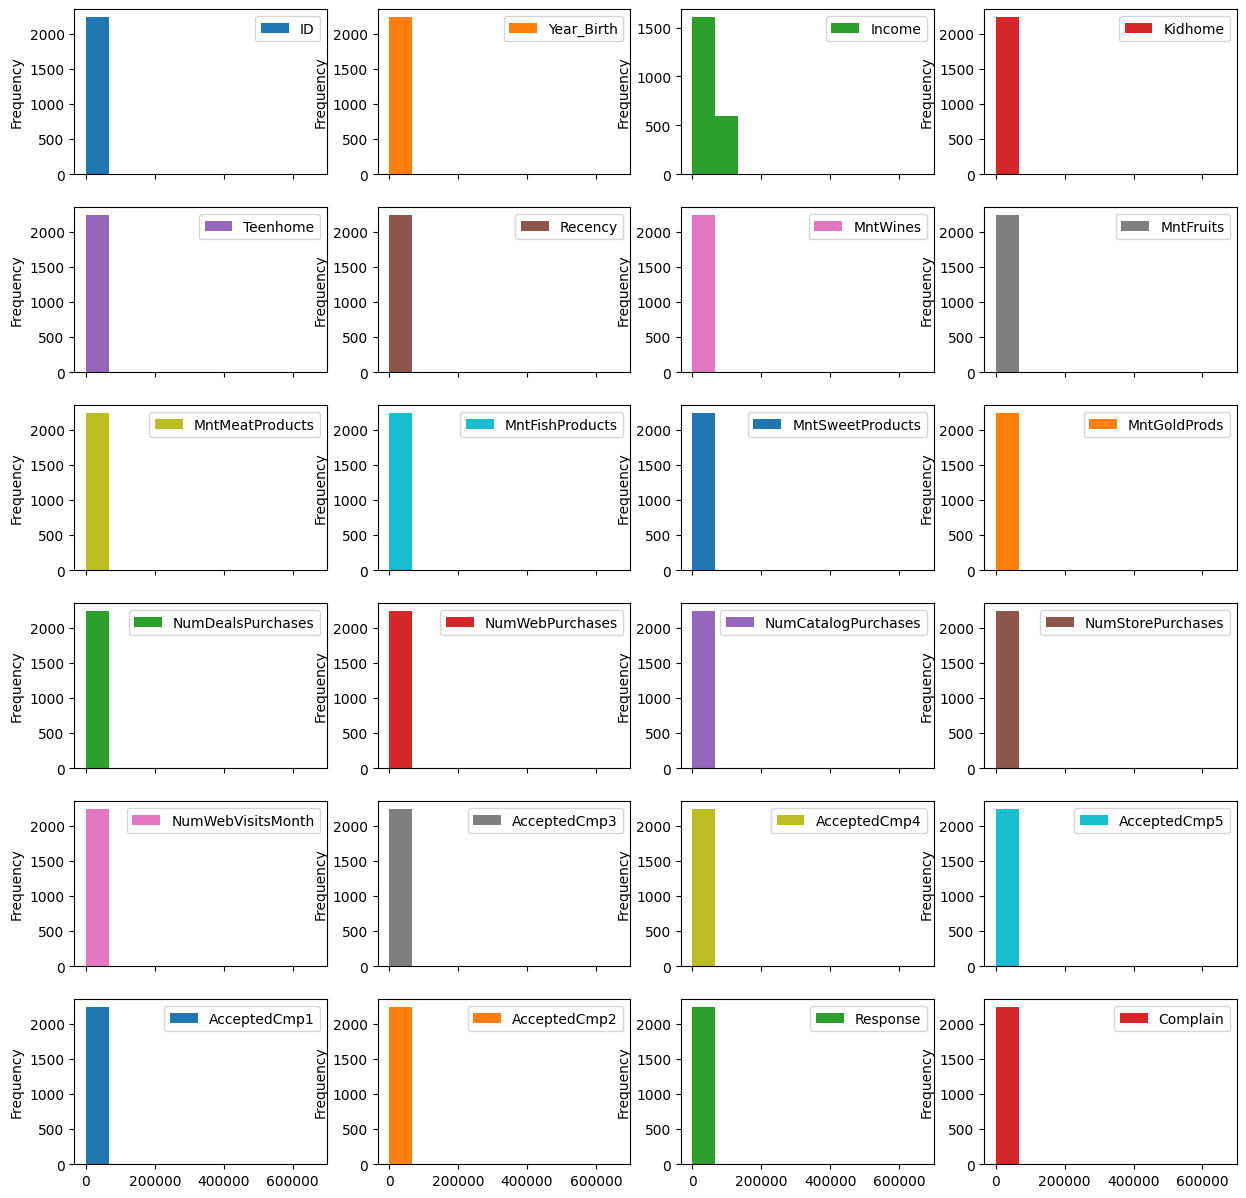

In [28]:
df.plot(kind='hist', subplots=True, layout=(6, 4), figsize=(15, 15))

ID                         Axes(0.125,0.77;0.168478x0.11)
Year_Birth              Axes(0.327174,0.77;0.168478x0.11)
Income                  Axes(0.529348,0.77;0.168478x0.11)
Kidhome                 Axes(0.731522,0.77;0.168478x0.11)
Teenhome                  Axes(0.125,0.638;0.168478x0.11)
Recency                Axes(0.327174,0.638;0.168478x0.11)
MntWines               Axes(0.529348,0.638;0.168478x0.11)
MntFruits              Axes(0.731522,0.638;0.168478x0.11)
MntMeatProducts           Axes(0.125,0.506;0.168478x0.11)
MntFishProducts        Axes(0.327174,0.506;0.168478x0.11)
MntSweetProducts       Axes(0.529348,0.506;0.168478x0.11)
MntGoldProds           Axes(0.731522,0.506;0.168478x0.11)
NumDealsPurchases         Axes(0.125,0.374;0.168478x0.11)
NumWebPurchases        Axes(0.327174,0.374;0.168478x0.11)
NumCatalogPurchases    Axes(0.529348,0.374;0.168478x0.11)
NumStorePurchases      Axes(0.731522,0.374;0.168478x0.11)
NumWebVisitsMonth         Axes(0.125,0.242;0.168478x0.11)
AcceptedCmp3  

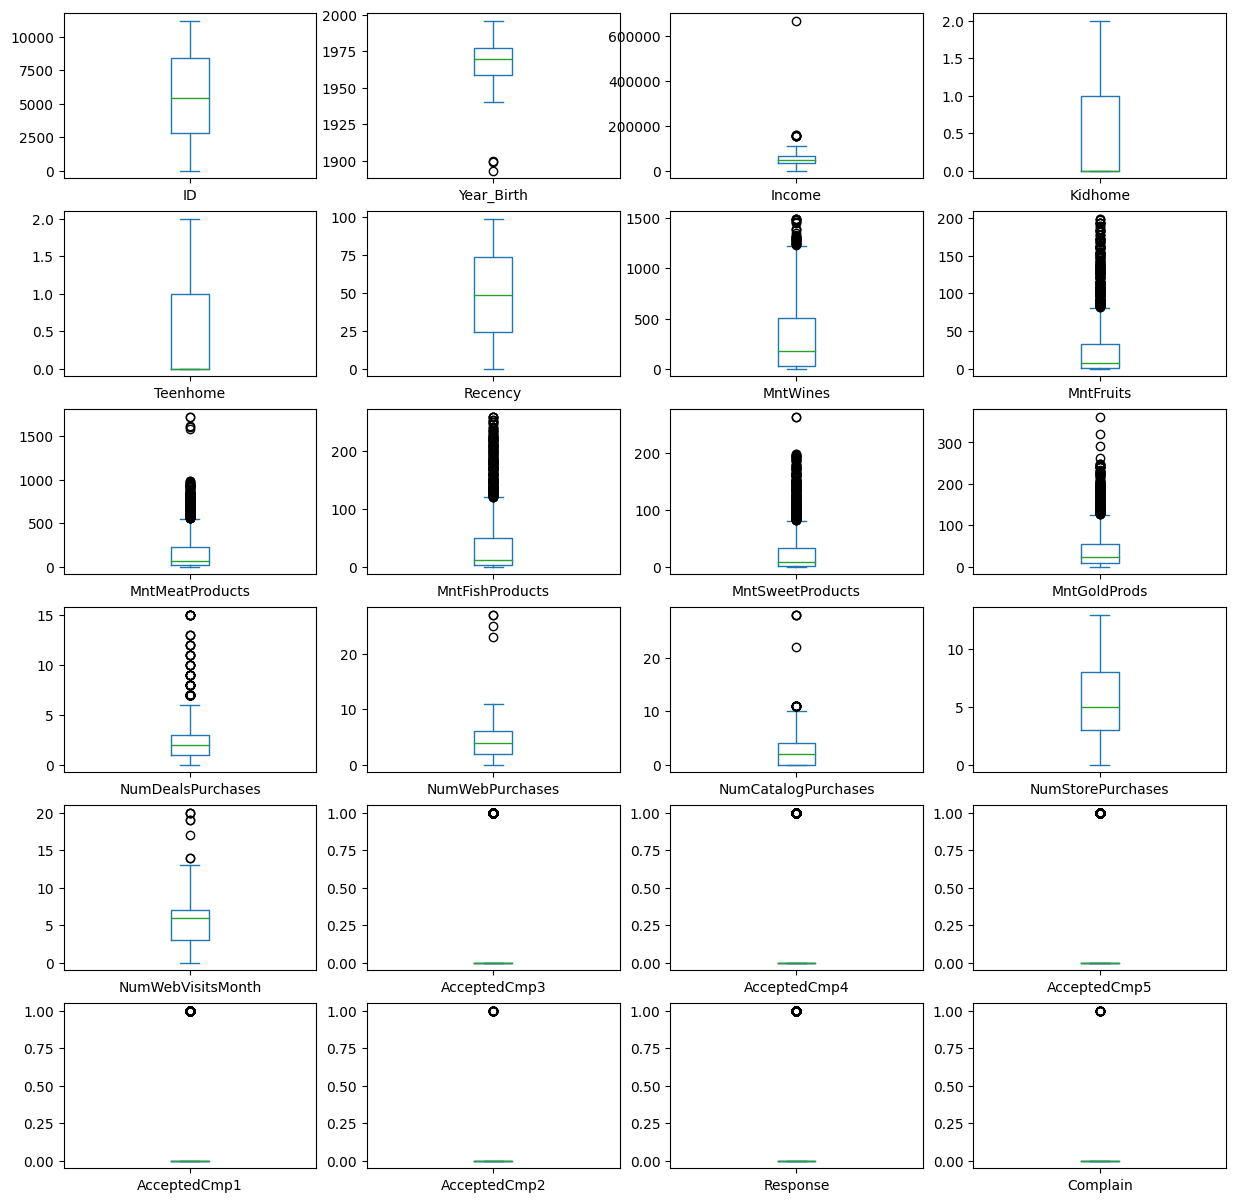

In [30]:
df.plot(kind='box', subplots=True, layout=(6, 4), figsize=(15, 15))

3. Bivariate Analysis

a. Continuous vs Continuous Numerical Data

In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325,-0.030128
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,0.133047,-0.027225
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953


<Axes: xlabel='Income', ylabel='MntWines'>

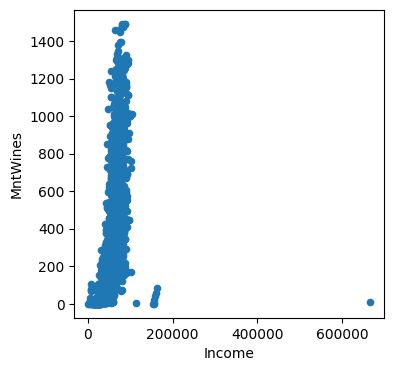

In [32]:
df.plot(kind='scatter', x='Income', y='MntWines', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

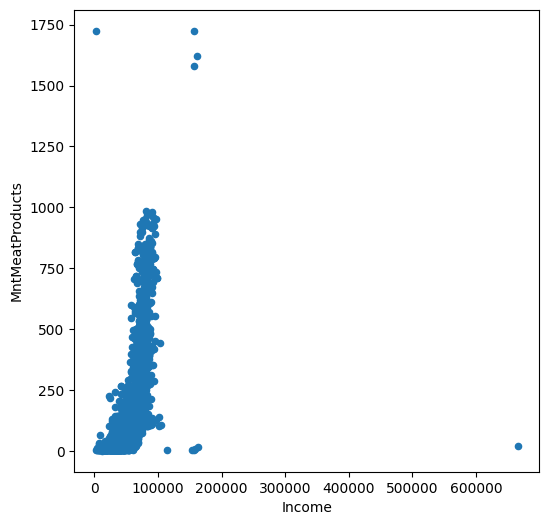

In [34]:
df.plot(kind='scatter', x='Income', y='MntMeatProducts', figsize=(6, 6))

b. Discrete vs Discrete Data

In [35]:
pd.crosstab(df['Marital_Status'], df['Response'])

Response,0,1
Marital_Status,,
Absurd,1,1
Alone,2,1
Divorced,184,48
Married,766,98
Single,374,106
Together,520,60
Widow,58,19
YOLO,1,1


In [36]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize=True)

Response,0,1
Marital_Status,,
Absurd,0.000446,0.000446
Alone,0.000893,0.000446
Divorced,0.082143,0.021429
Married,0.341964,0.043750
Single,0.166964,0.047321
Together,0.232143,0.026786
Widow,0.025893,0.008482
YOLO,0.000446,0.000446


In [37]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.793103,0.206897
Married,0.886574,0.113426
Single,0.779167,0.220833
Together,0.896552,0.103448
Widow,0.753247,0.246753
YOLO,0.500000,0.500000


In [38]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index', margins=True)

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.793103,0.206897
Married,0.886574,0.113426
Single,0.779167,0.220833
Together,0.896552,0.103448
Widow,0.753247,0.246753
YOLO,0.500000,0.500000
All,0.850893,0.149107


In [39]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns')

Response,0,1
Marital_Status,,
Absurd,0.000525,0.002994
Alone,0.001049,0.002994
Divorced,0.096537,0.143713
Married,0.401889,0.293413
Single,0.196222,0.317365
Together,0.272823,0.179641
Widow,0.030430,0.056886
YOLO,0.000525,0.002994


In [40]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns', margins=True)

Response,0,1,All
Marital_Status,,,
Absurd,0.000525,0.002994,0.000893
Alone,0.001049,0.002994,0.001339
Divorced,0.096537,0.143713,0.103571
Married,0.401889,0.293413,0.385714
Single,0.196222,0.317365,0.214286
Together,0.272823,0.179641,0.258929
Widow,0.030430,0.056886,0.034375
YOLO,0.000525,0.002994,0.000893


<Axes: xlabel='Marital_Status'>

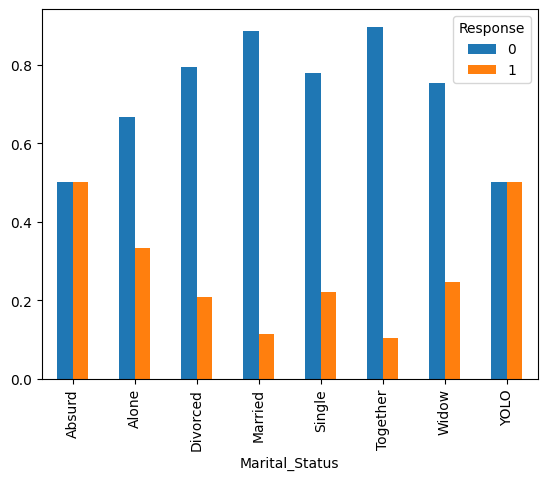

In [41]:
tab = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='Marital_Status'>

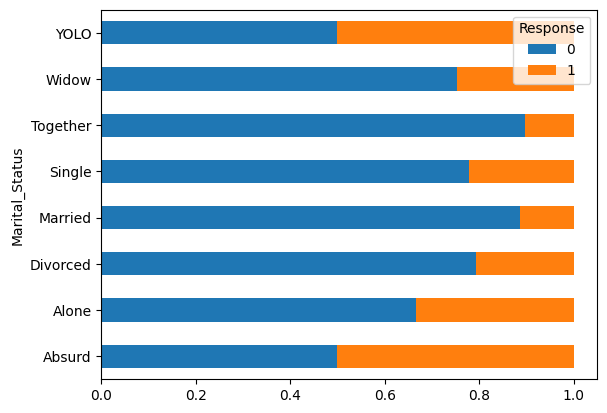

In [42]:
tab.plot(kind='barh', stacked=True)

c. Continuous Numerical vs Discrete Data

In [43]:
group = df.groupby('Marital_Status')

group['Income'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Marital_Status,,,,
Absurd,65487.0,79244.0,72365.500000,72365.5
Alone,34176.0,61331.0,43789.000000,35860.0
Divorced,1730.0,153924.0,52834.228448,52683.0
Married,2447.0,160803.0,51724.978996,51876.0
Single,3502.0,113734.0,50995.350318,48904.0
Together,5648.0,666666.0,53245.534031,51369.0
Widow,22123.0,85620.0,56481.552632,56551.0
YOLO,48432.0,48432.0,48432.000000,48432.0


<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

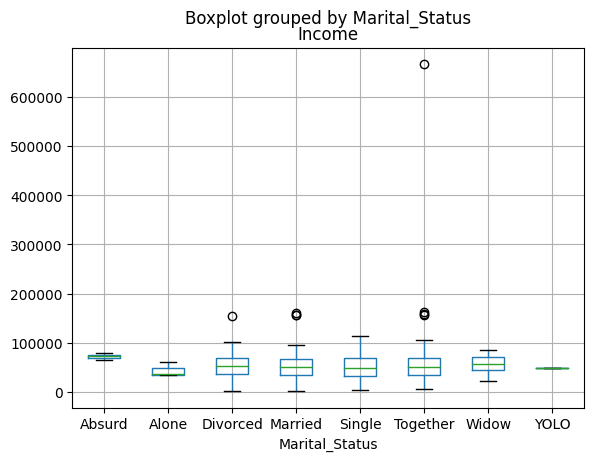

In [44]:
df.boxplot(by='Marital_Status', column='Income')